# Organize captures and associated metadata into table

## step-by-step

In [15]:
from glob import glob
import os
import pandas as pd

qcams = []
dirs = []
dPaths = ["/media/DATA/MAK/GRISZ_02/AA0001","/media/DATA/MAK/GRISZ_03/AA0001","/media/DATA/MAK/GRISZ_05/AA0001"]
# dPaths = ["/media/DATA/MAK/GRISZ_02/AA0001","/media/DATA/MAK/GRISZ_05/AA0001"]
# dPaths = ["/media/DATA/MAK/GRISZ_02/AA0001"]

for p in dPaths:
    qpaths = glob(os.path.join(p,'*.qcamraw'))
    qcams.extend(qpaths)
    dirs.extend([p]*len(qpaths))

df = pd.DataFrame(zip(qcams,dirs),columns=['qcam','dir'])
df



,qcam,dir
0,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0015...,/media/DATA/MAK/GRISZ_02/AA0001
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001
...,...,...
290,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001
291,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001
292,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001
293,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001


In [25]:
# assume 1:1 mapping of qcamraw to XSG
import os

df['xsg'] = df['qcam'].apply(lambda x: x.replace('.qcamraw','.xsg') if os.path.exists(x.replace('.qcamraw','.xsg')) else None)
df = df.dropna()
df


,qcam,dir,xsg
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...
5,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...
...,...,...,...
290,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...
291,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...
292,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...
293,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...


In [28]:
import lib.metadataProcess as metadataProcess
# assume relevant pulse is first
print(metadataProcess.getPulseNames(df['xsg'].iloc[0]))
df['pulse'] = df['xsg'].apply(lambda x: metadataProcess.getPulseNames(x)[0])
df

['6-64kHz_40dB_10000msTotal_Fs250kHz', 'Loop_tenSecLED_1_13', 'cameraTTL_20Hz_1']


/tmp/ipykernel_101002/4188171080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pulse'] = df['xsg'].apply(lambda x: metadataProcess.getPulseNames(x)[0])


,qcam,dir,xsg,pulse
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz
5,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz
...,...,...,...,...
290,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz
291,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz
292,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz
293,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz


In [31]:
import importlib
importlib.reload(metadataProcess)
df['dB'] = df['pulse'].apply(metadataProcess.getPulseDB)
df

/tmp/ipykernel_101002/3295841340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dB'] = df['pulse'].apply(metadataProcess.getPulseDB)


,qcam,dir,xsg,pulse,dB
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40
5,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50
...,...,...,...,...,...
290,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30
291,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70
292,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz,80
293,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz,40


## using library

In [5]:
import lib.fileIngest as fileIngest

dPaths = ["/media/DATA/MAK/GRISZ_02/AA0001","/media/DATA/MAK/GRISZ_03/AA0001","/media/DATA/MAK/GRISZ_05/AA0001"]

df = fileIngest.qcamPath2table(dPaths)
df

,qcam,dir,xsg,pulse,dB
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40
5,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50
...,...,...,...,...,...
290,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30
291,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70
292,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz,80
293,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz,40


In [6]:
import importlib
importlib.reload(fileIngest)
# get img data:
df,qcam2img,qcam2header = fileIngest.loadQCamTable(df)
df

,qcam,dir,xsg,pulse,dB,timestamp_init,dim_YX
0,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40,11-18-2024_14:28:55,"(130, 174)"
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70,11-18-2024_14:33:56,"(130, 174)"
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30,11-18-2024_14:34:16,"(130, 174)"
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40,11-18-2024_14:34:36,"(130, 174)"
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50,11-18-2024_14:34:56,"(130, 174)"
...,...,...,...,...,...,...,...
283,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30,12-11-2024_16:15:03,"(130, 174)"
284,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70,12-11-2024_16:15:36,"(130, 174)"
285,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz,80,12-11-2024_16:15:56,"(130, 174)"
286,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz,40,12-11-2024_16:16:16,"(130, 174)"


(130, 174, 200)


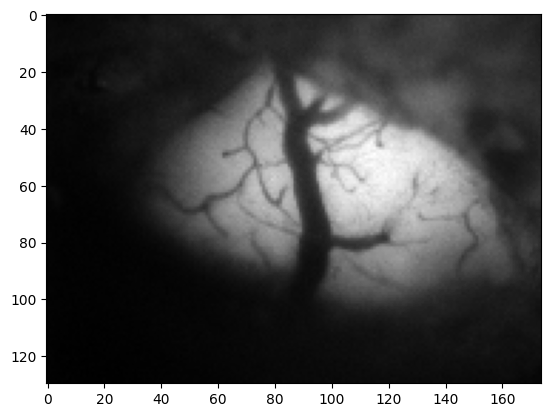

In [7]:
import matplotlib.pyplot as plt

print(qcam2img['/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017.qcamraw'].shape)
plt.imshow(qcam2img['/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017.qcamraw'][:,:,0],cmap='gray')